# Introduccion a Pandas

Pandas es una herramienta de analisis de datos tabulares 

In [1]:
import pandas as pd
pd.__version__

'1.3.5'

In [17]:
data_teams = {'year': 
        [2010 , 2011 , 2012 ,
        2010 , 2011 , 2012 ,
        2010 , 2011 , 2012],
        'team': [
        'Rangers','Rangers',
        'Rangers','Colo Colo',
        'Colo Colo','Colo Colo',
        'Universidad de Chile','Universidad de Chile',
        'Universidad de Chile'],
        'wins':[30 , 28 , 32 , 29 , 32 , 26 , 21 , 17 , 19] ,
        'draws':[6 , 7 , 4 , 5 , 4 , 7 , 8 , 10 , 8] ,
        'losses': [2 , 3 , 2 , 4 , 2 , 5 , 9 , 11 , 11]
        }

df = pd.DataFrame(data_teams ,columns=data_teams.keys())

In [18]:
df.head()

,year,team,wins,draws,losses
0,2010,Rangers,30,6,2
1,2011,Rangers,28,7,3
2,2012,Rangers,32,4,2
3,2010,Colo Colo,29,5,4
4,2011,Colo Colo,32,4,2


In [19]:
df.dtypes

year       int64
team      object
wins       int64
draws      int64
losses     int64
dtype: object

In [20]:
df['team'] = df['team'].astype('category')
df['year']=pd.to_datetime(df['year'], format='%Y')

In [21]:
df['team'].unique()

['Rangers', 'Colo Colo', 'Universidad de Chile']
Categories (3, object): ['Colo Colo', 'Rangers', 'Universidad de Chile']

In [24]:
type(df['team']=='Rangers')

pandas.core.series.Series

In [22]:
df_talca=df[df['team']=='Rangers']

In [26]:
df_talca

,year,team,wins,draws,losses
0,2010-01-01,Rangers,30,6,2
1,2011-01-01,Rangers,28,7,3
2,2012-01-01,Rangers,32,4,2


In [27]:
df.dtypes

year      datetime64[ns]
team            category
wins               int64
draws              int64
losses             int64
dtype: object

La tabla ``df`` se encuentra indexada mediante un objeto del tipo ``pd.Index`` que nos sirve para acceder a los registros individuales.

In [29]:
print(df.index)

RangeIndex(start=0, stop=9, step=1)


In [30]:
df[df.index==0]

,year,team,wins,draws,losses
0,2010-01-01,Rangers,30,6,2


In [31]:
df.iloc[0]

year      2010-01-01 00:00:00
team                  Rangers
wins                       30
draws                       6
losses                      2
Name: 0, dtype: object

In [32]:
df[0:2]

,year,team,wins,draws,losses
0,2010-01-01,Rangers,30,6,2
1,2011-01-01,Rangers,28,7,3


In [40]:
sum_data=df.groupby(['year','team']).mean()

In [41]:
print(sum_data)

                                 wins  draws  losses
year       team                                     
2010-01-01 Colo Colo             29.0    5.0     4.0
           Rangers               30.0    6.0     2.0
           Universidad de Chile  21.0    8.0     9.0
2011-01-01 Colo Colo             32.0    4.0     2.0
           Rangers               28.0    7.0     3.0
           Universidad de Chile  17.0   10.0    11.0
2012-01-01 Colo Colo             26.0    7.0     5.0
           Rangers               32.0    4.0     2.0
           Universidad de Chile  19.0    8.0    11.0


In [37]:
sum_data.index

DatetimeIndex(['2010-01-01', '2011-01-01', '2012-01-01'], dtype='datetime64[ns]', name='year', freq=None)

# Multiplicacion de Enteros

In [42]:
import time
import numpy as np

def naive_sum_multiply(a, b):
    val=0
    for i in range(a):
        val+=b
    return val


def naive_multiply(a, b):
    if len(str(a)) == 1 or len(str(b)) == 1:
        return a * b
    else:
        x=str(a)
        y=str(b)
        m1=len(x) 
        m2=len(y)
        val=0
        for i in range(m1):
            for j in range(m2):
                prod=int(x[i])*int(y[j])
                power=pow(10,(m1-i-1)+(m2-j-1))
                val+=prod*power
        return val

def karatsuba(a, b):
    if len(str(a)) == 1 or len(str(b)) == 1:
        return a * b
    else:
        m1 = max(len(str(a)), len(str(b)))
        m2 = m1 // 2

        a1, a2 = divmod(a, 10**m2)
        b1, b2 = divmod(b, 10**m2)

        x = karatsuba(a2, b2)
        y = karatsuba((a1 + a2), (b1 + b2))
        z = karatsuba(a1, b1)

        return (z * 10 ** (2 * m2)) + ((y - z - x) * 10 ** (m2)) + (x)

In [49]:
a=np.random.randint(1e2)
b=np.random.randint(1e2)
t1=time.time()
z=karatsuba(a,b)
ellapsed_time=time.time()-t1
print('a : {}, b : {}, a*b : {}, time : {} '.format(a,b,z,ellapsed_time))


a : 41, b : 79, a*b : 3239, time : 5.6743621826171875e-05 


In [72]:
time_data={'method':list(),'ellapsed_time':list(),'problem_size':list()}

In [77]:
methods=['karatsuba','naive_multiply']
problems=[1e2,1e4,1e8,1e10,1e12,1e14,1e16,1e18]
sample_size=100

In [78]:
for m in methods:
  for p in problems:
    for i in range(sample_size):
      a=np.random.randint(p)
      b=np.random.randint(p)
      t1=time.time()
      eval(m)(a,b)
      ellapsed_time=time.time()-t1
      time_data['problem_size'].append(p)
      time_data['method'].append(m)
      time_data['ellapsed_time'].append(ellapsed_time)

In [68]:
time_data

{'ellapsed_time': [4.124641418457031e-05,
  2.288818359375e-05,
  1.9311904907226562e-05,
  2.4557113647460938e-05,
  3.743171691894531e-05,
  2.09808349609375e-05,
  1.9311904907226562e-05,
  1.9311904907226562e-05,
  3.457069396972656e-05,
  2.2172927856445312e-05,
  1.8358230590820312e-05,
  2.7894973754882812e-05,
  2.384185791015625e-05,
  1.9073486328125e-05,
  1.2636184692382812e-05,
  2.09808349609375e-05,
  2.0503997802734375e-05,
  2.86102294921875e-05,
  2.1696090698242188e-05,
  1.2874603271484375e-05,
  2.86102294921875e-05,
  2.0503997802734375e-05,
  2.0265579223632812e-05,
  1.9550323486328125e-05,
  1.9073486328125e-05,
  1.9073486328125e-05,
  1.9073486328125e-05,
  2.4318695068359375e-05,
  2.9325485229492188e-05,
  1.9073486328125e-05,
  1.811981201171875e-05,
  2.4557113647460938e-05,
  3.695487976074219e-05,
  2.0265579223632812e-05,
  1.1444091796875e-05,
  1.9073486328125e-05,
  1.8358230590820312e-05,
  1.7404556274414062e-05,
  1.5974044799804688e-05,
  1.8119

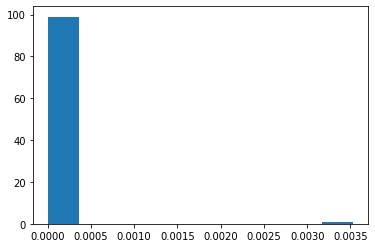

In [58]:
import matplotlib.pyplot as plt

plt.hist(results)
plt.show()

In [59]:
results=list()
for i in range(sample_size):
  a=np.random.randint(problems[0])
  b=np.random.randint(problems[0])
  t1=time.time()
  eval(methods[1])(a,b)
  ellapsed_time=time.time()-t1
  results.append(ellapsed_time)

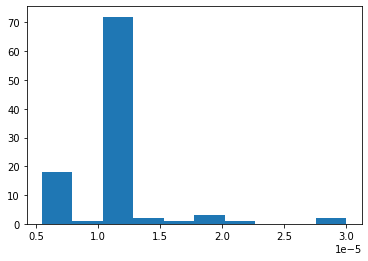

In [60]:
plt.hist(results)
plt.show()